# Cardiovascular Disease Prediction

## Overview

Cardiovascular diseases (CVDs) are the leading cause of death globally, taking an estimated 17.9 million lives each year(https://www.who.int/health-topics/cardiovascular-diseases#tab=tab_1). CVDs are a group of disorders of the heart and blood vessels and include coronary heart disease, cerebrovascular disease, rheumatic heart disease and other conditions. More than four out of five CVD deaths are due to heart attacks and strokes.Identifying those at high risk of Cardiovascular disease and ensuring they receive appropriate treatment can prevent premature deaths. 

## Business Understanding

Major cause for cardiovascular disease are High level of gulcose,  cholesterol, BMI, blood pressure and so on. This project predicts whether a person has cardiovascular disease or not using different classification model. 

## Goal

The goal is to predict the presence or absence of cardiovascular disease (CVD) using the patient examination results.

## Approach

We will follow the OSEMN (Obtain-Scrub-Explore-Model-Interpret)process for this project.

- checking for null values and duplicates
- dropping ID column
- changing age from days to years
- heights and weights that seemed too high or too low
- systolic or diastolic pressure readings that were negative, unusually low, or diastolic was lower than systolic
- adding new BMI column
- one hot encoding of cholesterol and glucose column


## Data

The data used for this project was obtained from Kaggle(https://www.kaggle.com/sulianova/cardiovascular-disease-dataset). The data contains 12 features and 1 target. It is a larger dataset with 70,000 entries. The target variable is balanced. It consist of 7 categorical features including the target variable. 

### Data description

There are 3 types of input features

- Objective: factual information
- Examination: results of medical examination
- Subjective: information given by the patient


### Features:

- Age | Objective Feature | age | int (days)
- Height | Objective Feature | height | int (cm) 
- Weight | Objective Feature | weight | float (kg) 
- Gender | Objective Feature | gender | categorical code 
- Systolic blood pressure | Examination Feature | ap_hi | int 
- Diastolic blood pressure | Examination Feature | ap_lo | int 
- Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal 
- Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal 
- Smoking | Subjective Feature | smoke | binary 
- Alcohol intake | Subjective Feature | alco | binary 
- Physical activity | Subjective Feature | active | binary 
- Presence or absence of cardiovascular disease | Target Variable | cardio | binary 


## Obtain

First process is to import the necessary packages

In [1]:
## importing necessary packages
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, accuracy_score, classification_report,confusion_matrix, roc_auc_score, plot_confusion_matrix, roc_curve, auc, plot_roc_curve

After importing the packages from the library, load the dataset

In [2]:
## load the dataset
df = pd.read_csv('../data/cardio_train.csv', sep= ';')

In [3]:
## first five rows of the data
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
## check the shape of the dataset
df.shape

(70000, 13)

In [5]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [6]:
## check the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [7]:
## summary statistics of the data
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


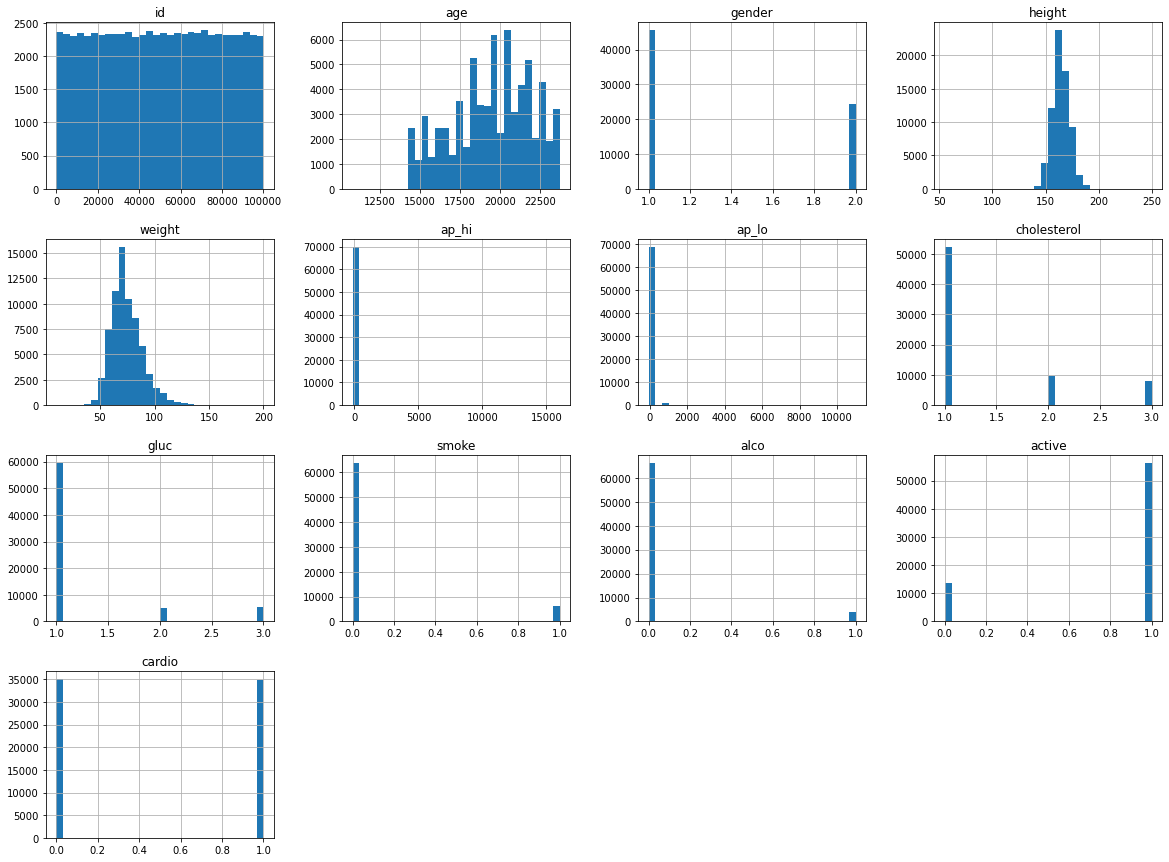

In [8]:
df.hist(bins=30, figsize=(20,15));

Check value counts for cholesterol, glucose, smoking, and cardio disease

In [9]:
## value count for cholesterol column
df.cholesterol.value_counts()

1    52385
2     9549
3     8066
Name: cholesterol, dtype: int64

In [10]:
##check the glucose range value counts
df.gluc.value_counts()

1    59479
3     5331
2     5190
Name: gluc, dtype: int64

In [11]:
## check the smoking value count
df.smoke.value_counts()

0    63831
1     6169
Name: smoke, dtype: int64

In [12]:
## check the Alchocol intake value count
df.alco.value_counts()

0    66236
1     3764
Name: alco, dtype: int64

In [13]:
## check the physical activity value count
df.active.value_counts()

1    56261
0    13739
Name: active, dtype: int64

In [14]:
## cardiovascular disease value counts
df.cardio.value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

In [15]:
df.gender.value_counts()

1    45530
2    24470
Name: gender, dtype: int64

## Scrub

let's drop the id column

In [16]:
## dropping the id column
df.drop('id', axis = 1, inplace = True)

In [17]:
## first five rows of the data after dropping the id column
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [18]:
## check for the duplicate values
df.duplicated(keep=False)

0        False
1        False
2        False
3        False
4        False
         ...  
69995    False
69996    False
69997    False
69998    False
69999    False
Length: 70000, dtype: bool

In [19]:
## check for the null values
df.isna().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

Since it is a cleaned data there are no null values present.

Since age is given in days, we will convert it to years

In [20]:
#Converting the age column from days to years
df['age'] = round(df['age']/365, 1)

In [21]:
#finding the minimum age
df['age'].min()

29.6

In [22]:
#finding the maximum age
df['age'].max()

65.0

In [23]:
#first five rows of the data
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.4,2,168,62.0,110,80,1,1,0,0,1,0
1,55.4,1,156,85.0,140,90,3,1,0,0,1,1
2,51.7,1,165,64.0,130,70,3,1,0,0,0,1
3,48.3,2,169,82.0,150,100,1,1,0,0,1,1
4,47.9,1,156,56.0,100,60,1,1,0,0,0,0


Let's check the height which is less than 125cm (4 feet) because it is less than the average height. 

In [24]:
# check for the heights less than 125cm
df[df['height'] < 125]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
224,59.7,2,76,55.0,120,80,1,1,0,0,1,0
3420,39.8,1,100,70.0,100,70,1,1,0,0,1,0
3735,48.3,1,120,70.0,120,70,1,1,0,0,1,0
3752,42.2,1,120,30.0,110,70,1,1,0,0,1,0
4212,44.1,1,120,80.0,120,80,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
65302,50.6,1,99,60.0,90,60,1,1,0,0,1,0
66023,40.0,1,120,80.0,120,70,2,1,0,0,1,0
66479,46.4,2,110,90.0,110,90,1,1,0,0,1,0
66643,51.6,1,57,61.0,130,90,1,1,0,0,1,1


In [25]:
#check for the heights higher than 125cm
df = df[df['height'] >= 125]

In [26]:
#check for the heights higher than 200(6'5" feet)
df[df['height'] > 200]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
6486,58.1,1,250,86.0,140,100,3,1,0,0,1,1
21628,52.2,2,207,78.0,100,70,1,1,0,1,1,0


Dialostic blood pressure (ap_lo) is the bottom number on your reading. A diastolic blood pressure (DBP) of somewhere between 60 and 90 mm Hg is good. Systolic blood pressure is the top number on your reading(ap_hi). Both systiolic and dialostic is important in monitoring heart health.  

In [27]:
# find where ap_lo is higher than ap_hi
df = df[df['ap_hi'] > df['ap_lo']]

In [28]:
#systolic blood pressure > 80
df = df[df['ap_hi'] > 80]

#Dialostic blood pressure > 50
df = df[df['ap_lo'] > 50]

In [29]:
#very high ap_hi
df = df[df['ap_hi'] < 250]

In [30]:
#very high ap_lo
df[df['ap_lo'] > 150]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
4781,51.9,1,158,74.0,200,170,1,1,0,0,1,1
4981,62.3,2,173,74.0,220,160,2,2,0,0,1,1
38022,59.6,1,161,84.0,196,182,2,2,0,0,1,1
43998,62.1,2,163,70.0,200,180,1,1,0,0,0,1
54987,53.4,1,169,80.0,200,160,3,3,0,0,1,0


Average weight is considered to be higher than 40kg.

In [31]:
#weight below 40kg
df = df[df['weight'] >= 40]

In [32]:
#reset index
df.reset_index(inplace= True, drop= True)

In [33]:
#shape of the dataframe
df.shape

(68414, 12)

## Explore

In the Explore process, examine the data before the process of machine learning(modelling). 

### Age 

Let's analyse the age column, we have already found minimum age (29.6) and maximum age (65).

In [34]:
##check the age less than 30
df[df['age'] < 30]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
6072,29.8,1,175,59.0,120,80,1,1,0,0,1,0
21838,29.6,2,175,92.0,100,60,1,1,0,0,1,0
29971,29.8,1,159,59.0,120,80,1,1,0,0,1,0


In [35]:
# Ages into specific age categories
#Age less than 40 will fall into age range 30
df.loc[(df['age'] < 40), 'age_range'] = 30
#Age between 40 - 50 fall into 40's age range
df.loc[(df['age'] >= 40) & (df['age'] < 50), 'age_range'] = 40
#Age between 50 - 60 fall into 50's age range
df.loc[(df['age'] >= 50) & (df['age'] < 60), 'age_range'] = 50
#Age between 60 - 70 fall into 60's age range
df.loc[(df['age'] >= 60) & (df['age'] < 70), 'age_range'] = 60

In [36]:
#Age range value count
df.age_range.value_counts(normalize= True)

50.0    0.507089
40.0    0.278423
60.0    0.191525
30.0    0.022963
Name: age_range, dtype: float64

In [37]:
df.age_range = df.age_range.astype(int)

In [38]:
df.age_range.value_counts(normalize= True)

50    0.507089
40    0.278423
60    0.191525
30    0.022963
Name: age_range, dtype: float64

very less patients are below 30 age and most of the patient are between 50 - 60. 

Text(0, 0.5, 'Patients')

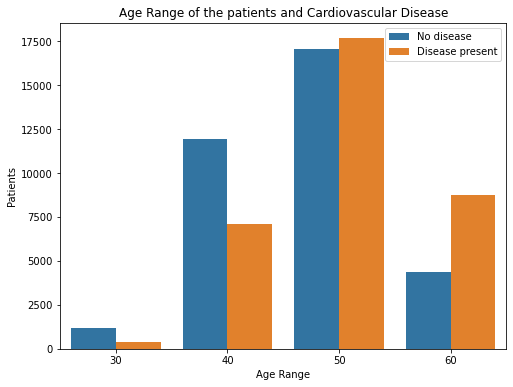

In [39]:
#barplot to see the age range and cardiovascular disease

plt.figure(figsize= (8, 6))
sns.countplot(x= 'age_range', hue= 'cardio', data= df)
plt.title('Age Range of the patients and Cardiovascular Disease')
plt.xlabel('Age Range')
plt.legend( ['No disease', 'Disease present'])
plt.ylabel('Patients')

from the graph, people's age ranging from 50 - 60 has more number of cardiovascular disease. people with the age between 30 - 40 are less likely affected from the disease. 

### Gender 

Gender is categorized into Male and Female

In [40]:
## gender value counts
df.gender.value_counts(normalize= True)

1    0.650978
2    0.349022
Name: gender, dtype: float64

We assume that 1 refers to Male and 2 refers to Female. 

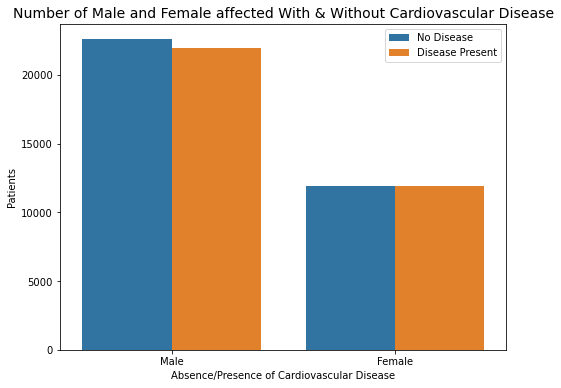

In [41]:
legend_labels = ['No Disease', 'Disease Present']

fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(data=df, x='gender', hue= 'cardio', ax=ax)
ax.title.set_text('Age')
ax.set_xticklabels(['Male', 'Female'])
plt.title('Number of Male and Female affected With & Without Cardiovascular Disease', fontsize= 14)
plt.xlabel('Absence/Presence of Cardiovascular Disease')
plt.ylabel('Patients')
plt.legend(legend_labels)

from the graph, it shows that both men and women are equally affected by cardiovascular disease. 

### Cholestrol 

Cholesterol is a waxy substance found in your blood. Your body needs cholesterol to build healthy cells, but high levels of cholesterol can increase your risk of heart disease. With high cholesterol, you can develop fatty deposits in your blood vessels.

In [42]:
# cholestrol value counts
df.cholesterol.value_counts(normalize= True)

1    0.749803
2    0.135440
3    0.114757
Name: cholesterol, dtype: float64

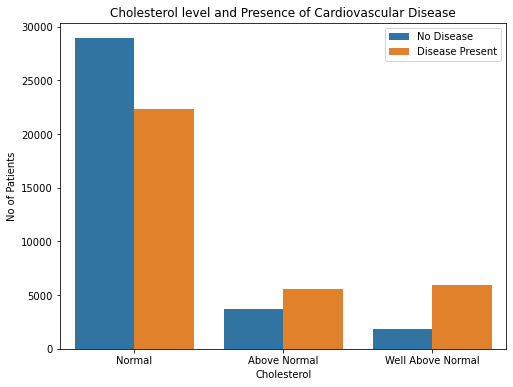

In [43]:
legend_labels = ['No Disease', 'Disease Present']

fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(x= 'cholesterol', hue= 'cardio', data= df)
ax.set_xticklabels(['Normal', 'Above Normal', 'Well Above Normal'])
plt.title('Cholesterol level and Presence of Cardiovascular Disease')
plt.xlabel('Cholesterol')
plt.ylabel('No of Patients')
plt.legend(legend_labels)

From the graph, people with above normal and well above normal condition are highly affected by cardiovascular disease. 

Cholesterol levels "above normal" and "well above normal" increase an chance of being diagnosed with cardiovascular disease. However, having "normal" cholesterol levels does not decrease your chances. There are many people with normal cholesterol levels and affected by cardiovascular disease.

### Glucose 

Glucose is the main type of sugar in the blood and is the major source of energy for the body's cells. Glucose comes from the foods we eat or the body can make it from other substances. 

In [44]:
#glucose value counts
df.gluc.value_counts(normalize=True)

1    0.850191
3    0.076052
2    0.073757
Name: gluc, dtype: float64

Text(0, 0.5, 'No of Patients')

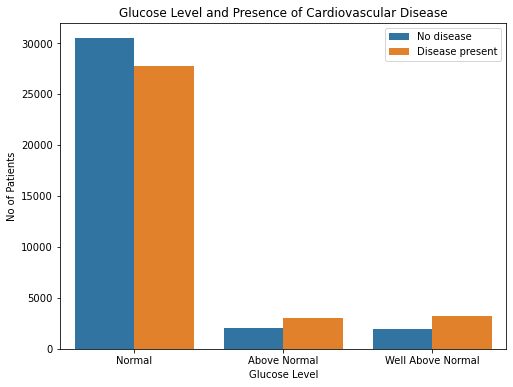

In [45]:
#plotting the presence of CVD with Glucose
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(x= 'gluc', hue= 'cardio', data= df)
plt.legend( ['No disease', 'Disease present'])
ax.set_xticklabels(['Normal', 'Above Normal', 'Well Above Normal'])
plt.title('Glucose Level and Presence of Cardiovascular Disease')
plt.xlabel('Glucose Level')
plt.ylabel('No of Patients')

Those with glucose levels "Above normal" or "Well above normal" were diagnosed with CVD more often than with normal glucose level.

### BMI

Body mass index (BMI) is a measure of body fat based on height and weight that applies to adult men and women. 

<AxesSubplot:xlabel='height', ylabel='weight'>

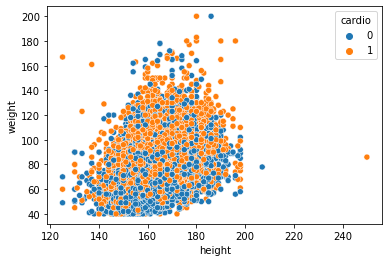

In [46]:
#plot the scatterplot for height, weight and cardiovascular disease
sns.scatterplot(x= 'height', y= 'weight', hue= 'cardio', data= df)

In [47]:
#Body mass index calculation
df['BMI']=round(df['weight']/((df['height']/100)**2),2)

In [48]:
#first five rows after adding a new column body mass index
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_range,BMI
0,50.4,2,168,62.0,110,80,1,1,0,0,1,0,50,21.97
1,55.4,1,156,85.0,140,90,3,1,0,0,1,1,50,34.93
2,51.7,1,165,64.0,130,70,3,1,0,0,0,1,50,23.51
3,48.3,2,169,82.0,150,100,1,1,0,0,1,1,40,28.71
4,47.9,1,156,56.0,100,60,1,1,0,0,0,0,40,23.01


BodyMassIndex(BMI)

Weight            BMI

- Under weight      <18.5
- Healthy weight    18.5 - 24.9
- Overweight        25 - 29.9

Obese
- Type 1            30 - 34.9
- Type 2            35 - 39.9
- Type 3.           >=40



Text(0.5, 69.0, '')

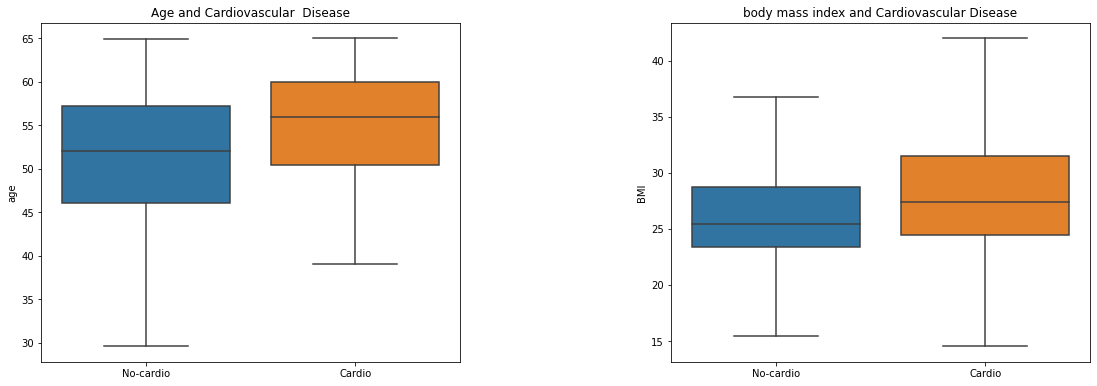

In [49]:
## plot the graph
fig, ax = plt.subplots(ncols=2, figsize=(20,10))
plt.tight_layout(pad=18)
sns.boxplot(data=df, x='cardio', y='age', ax=ax[0])
sns.boxplot(data=df, x='cardio', y='BMI', showfliers=False, ax=ax[1])
ax[0].title.set_text('Age and Cardiovascular  Disease')
ax[0].set_xticklabels(['No-cardio', 'Cardio'])
ax[1].title.set_text('body mass index and Cardiovascular Disease')
ax[1].set_xticklabels(['No-cardio', 'Cardio'])
ax[0].set_xlabel("")
ax[1].set_xlabel("")

### One Hot Encoding

With one-hot encoding, we convert each categorical value into a new categorical column and assign a binary value of 1 or 0 to those columns.

In [50]:
# since cholestrol and glucose are in int, convert them into categorical variable
df['cholesterol'] = df['cholesterol'].astype('category')
df['gluc'] = df['gluc'].astype('category')

In [51]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68414 entries, 0 to 68413
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   age          68414 non-null  float64 
 1   gender       68414 non-null  int64   
 2   height       68414 non-null  int64   
 3   weight       68414 non-null  float64 
 4   ap_hi        68414 non-null  int64   
 5   ap_lo        68414 non-null  int64   
 6   cholesterol  68414 non-null  category
 7   gluc         68414 non-null  category
 8   smoke        68414 non-null  int64   
 9   alco         68414 non-null  int64   
 10  active       68414 non-null  int64   
 11  cardio       68414 non-null  int64   
 12  age_range    68414 non-null  int64   
 13  BMI          68414 non-null  float64 
dtypes: category(2), float64(3), int64(9)
memory usage: 6.4 MB


In [52]:
# since cholestrol column is categorical create dummy variables.
d1 = pd.get_dummies(df['cholesterol'],prefix='chol',drop_first=True)

In [53]:
#since glucose column is categorical create dummy variables
d2 = pd.get_dummies(df['gluc'],prefix='gluc',drop_first=True)

In [54]:
#join the dataframe
df=pd.concat([df,d1,d2],axis=1)

In [55]:
#first five rows after joining all the dataframe
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_range,BMI,chol_2,chol_3,gluc_2,gluc_3
0,50.4,2,168,62.0,110,80,1,1,0,0,1,0,50,21.97,0,0,0,0
1,55.4,1,156,85.0,140,90,3,1,0,0,1,1,50,34.93,0,1,0,0
2,51.7,1,165,64.0,130,70,3,1,0,0,0,1,50,23.51,0,1,0,0
3,48.3,2,169,82.0,150,100,1,1,0,0,1,1,40,28.71,0,0,0,0
4,47.9,1,156,56.0,100,60,1,1,0,0,0,0,40,23.01,0,0,0,0


In [56]:
# column names
df.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio', 'age_range', 'BMI',
       'chol_2', 'chol_3', 'gluc_2', 'gluc_3'],
      dtype='object')

In [57]:
# selecting categorical column for plotting
categorical_df = df[['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']]

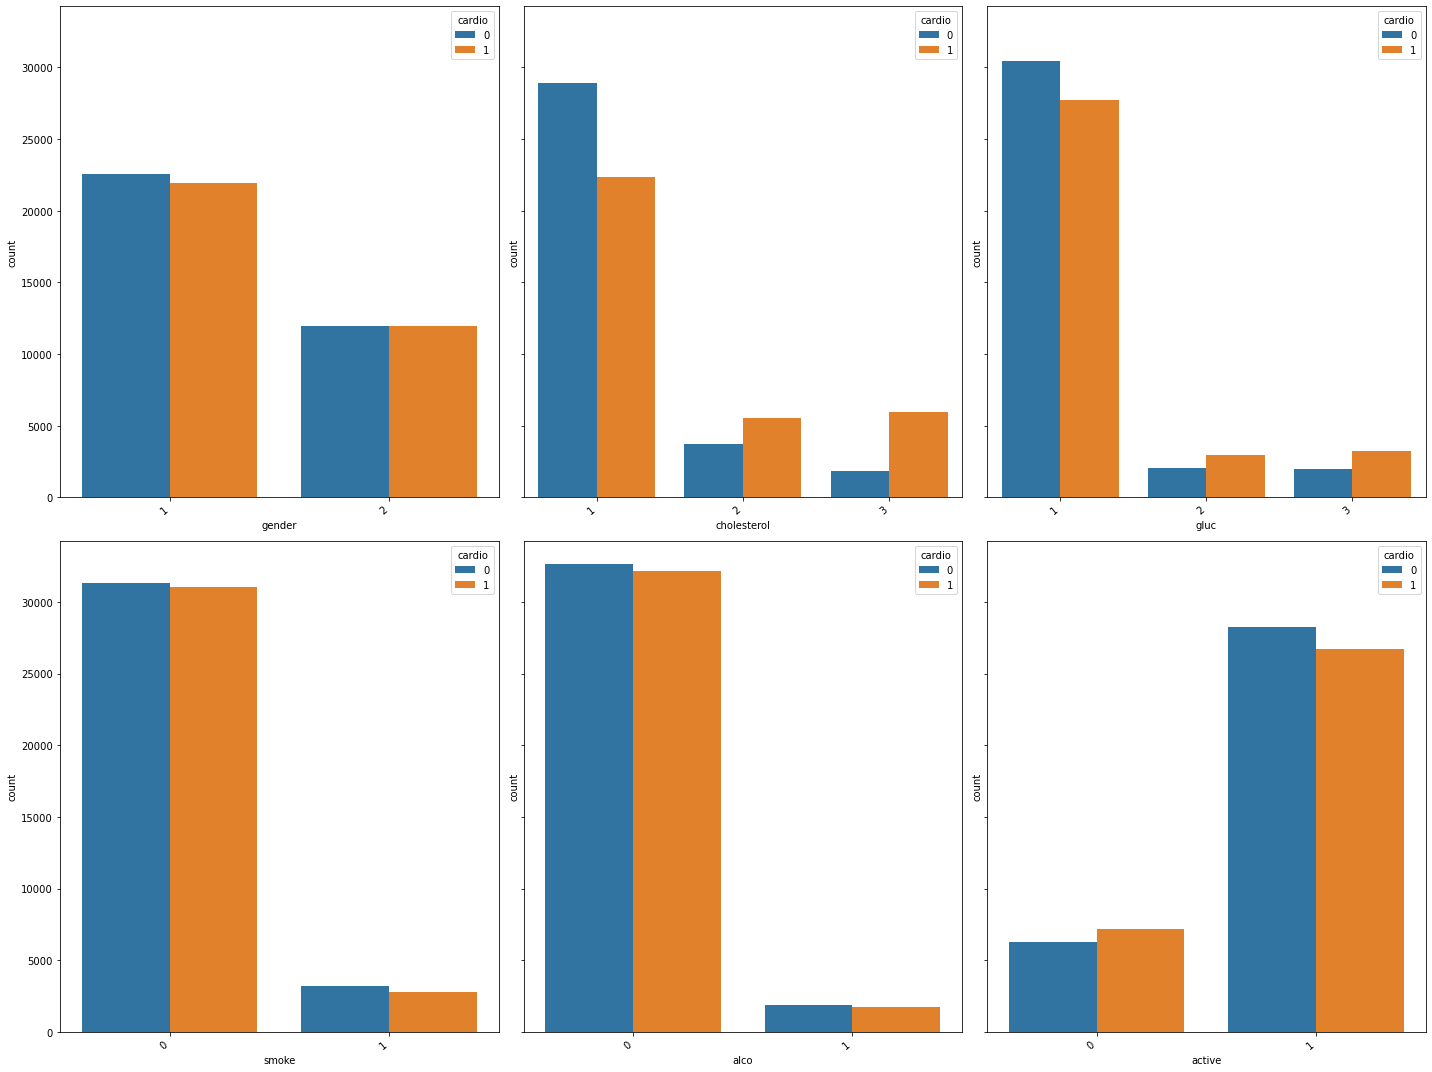

In [58]:
#Plotting the categorical variables
fig, axes = plt.subplots(2,3, figsize=(20, 15), sharey=True)
for col,ax in zip(categorical_df.columns,axes.flatten()):
    sns.countplot(x=col, hue='cardio',data=df,ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    plt.tight_layout()

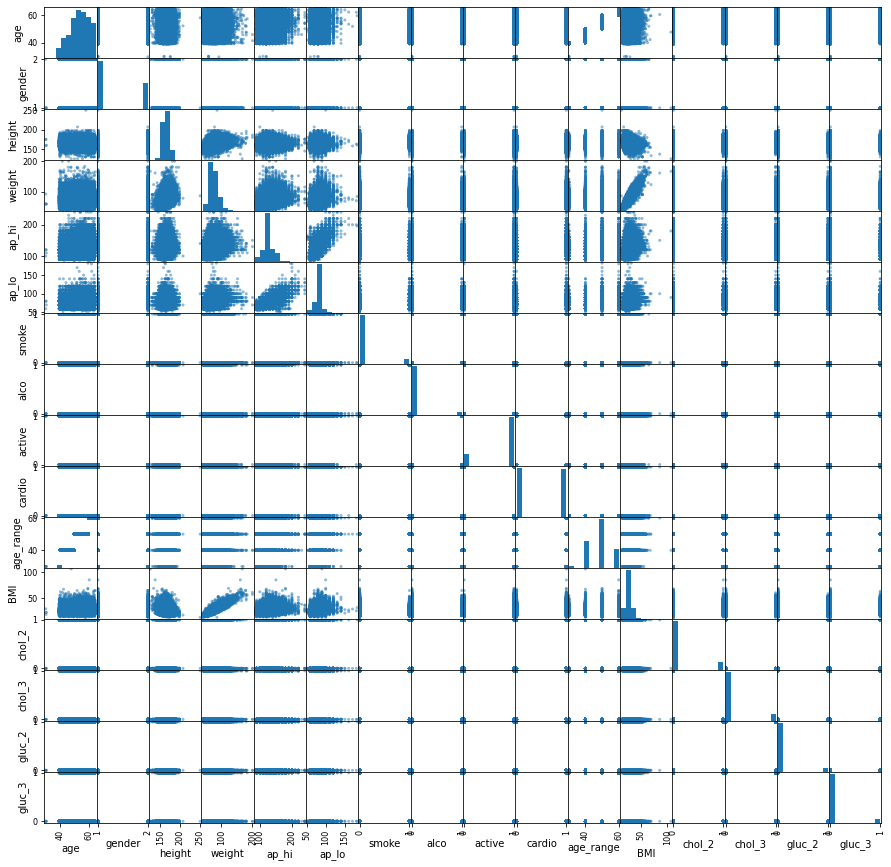

In [59]:
# scatter matrix to visualize data
pd.plotting.scatter_matrix(df, figsize = [15,15]);

### Heat Map

Heat map is a data visualization technique.

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,age_range,BMI,chol_2,chol_3,gluc_2,gluc_3
age,1.000000,0.023599,0.087269,0.054820,0.208947,0.155938,0.047680,0.028725,0.010566,0.239211,0.912885,0.103203,0.022306,0.153795,0.024876,0.094479
gender,0.023599,1.000000,0.520395,0.155994,0.061353,0.066264,0.338606,0.171319,0.005861,0.006669,0.023672,0.112254,0.017568,0.030131,0.005651,0.020356
height,0.087269,0.520395,1.000000,0.307751,0.015368,0.032935,0.196028,0.098098,0.009248,0.013445,0.079983,0.200649,0.027772,0.044455,0.015100,0.015493
weight,0.054820,0.155994,0.307751,1.000000,0.268889,0.251676,0.067342,0.067776,0.017427,0.179348,0.042234,0.865269,0.068008,0.114013,0.095931,0.068422
ap_hi,0.208947,0.061353,0.015368,0.268889,1.000000,0.735475,0.028387,0.035616,0.002038,0.428060,0.186584,0.268476,0.100898,0.154235,0.077085,0.063599
ap_lo,0.155938,0.066264,0.032935,0.251676,0.735475,1.000000,0.025634,0.037126,0.001003,0.341374,0.138152,0.241680,0.076431,0.132667,0.064454,0.049512
smoke,0.047680,0.338606,0.196028,0.067342,0.028387,0.025634,1.000000,0.340102,0.025034,0.016059,0.046009,0.033460,0.025022,0.002689,0.015624,0.013954
alco,0.028725,0.171319,0.098098,0.067776,0.035616,0.037126,0.340102,1.000000,0.024534,0.008355,0.030301,0.017682,0.038615,0.016684,0.030239,0.003879
active,0.010566,0.005861,0.009248,0.017427,0.002038,0.001003,0.025034,0.024534,1.000000,0.037924,0.012812,0.013653,0.005576,0.012121,0.011155,0.003110
cardio,0.239211,0.006669,0.013445,0.179348,0.428060,0.341374,0.016059,0.008355,0.037924,1.000000,0.212925,0.190703,0.080714,0.192397,0.053110,0.070150


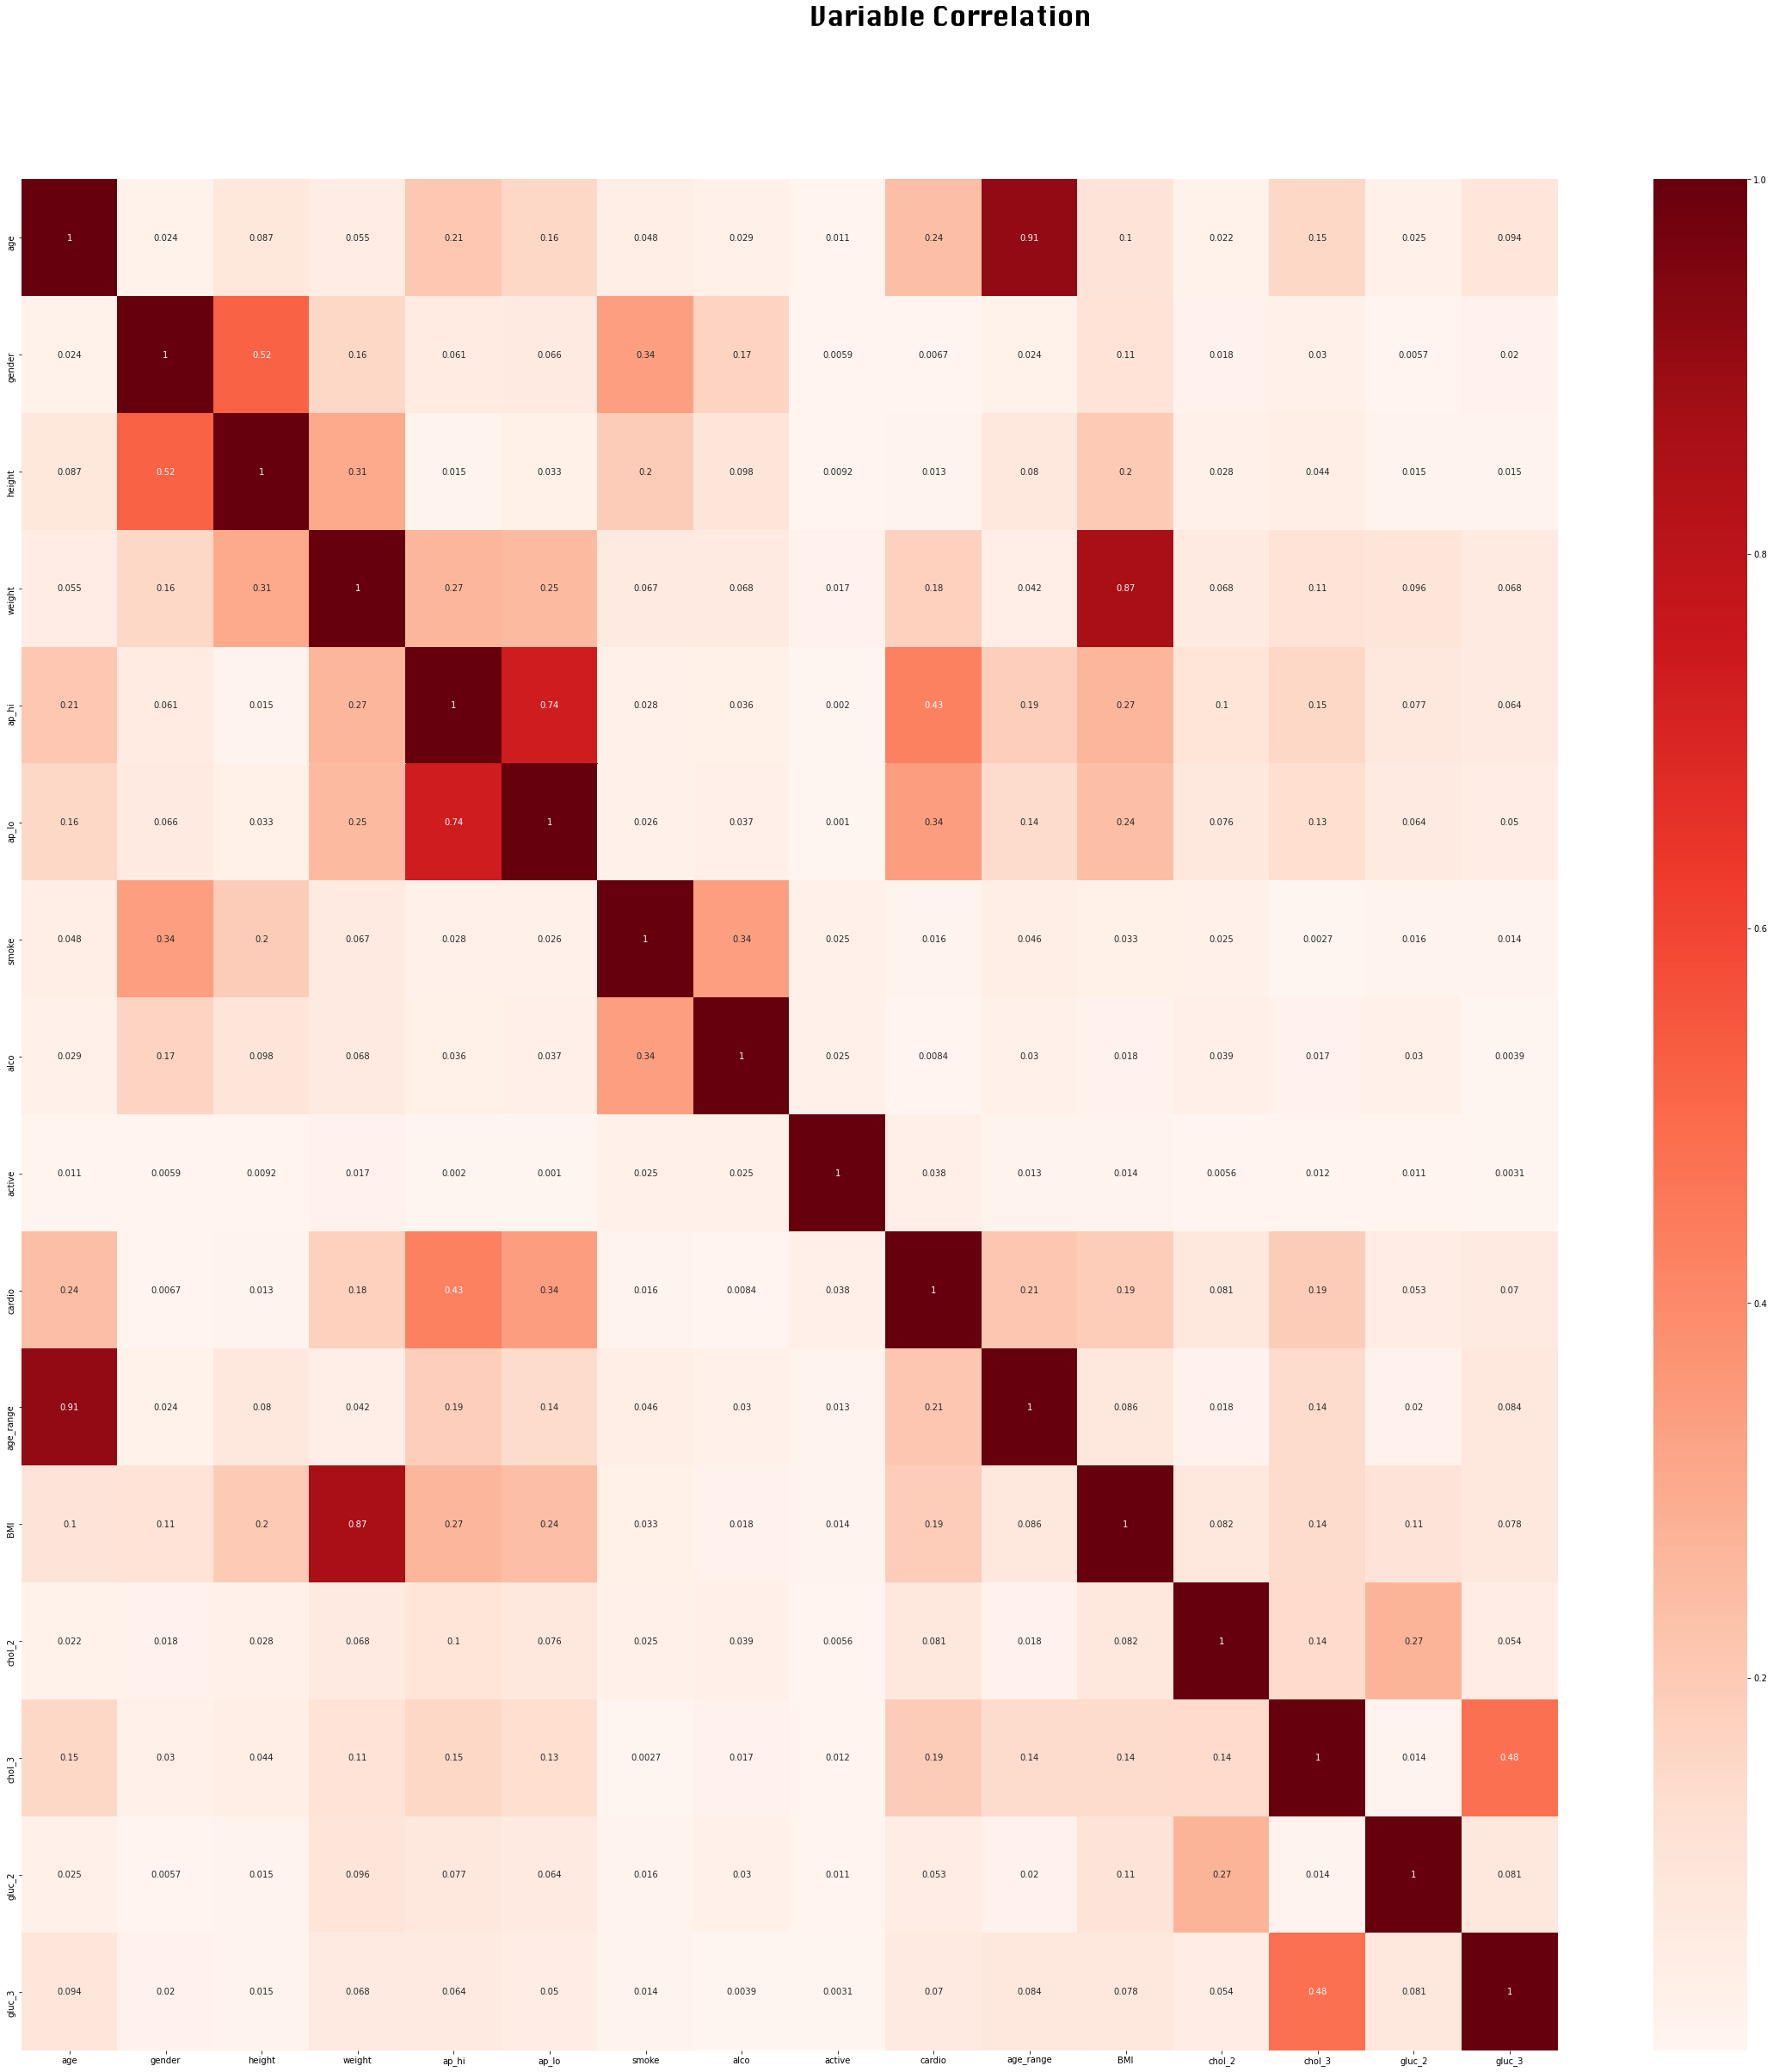

In [60]:
# check the collinearity with the target variable.
corr= df.corr().abs()
fig,ax= plt.subplots(figsize=(40,40))
fig.suptitle('Variable Correlation',fontsize=30,y=.95,fontname='Silom')
heatmap=sns.heatmap(corr,cmap='Reds', annot = True)
corr

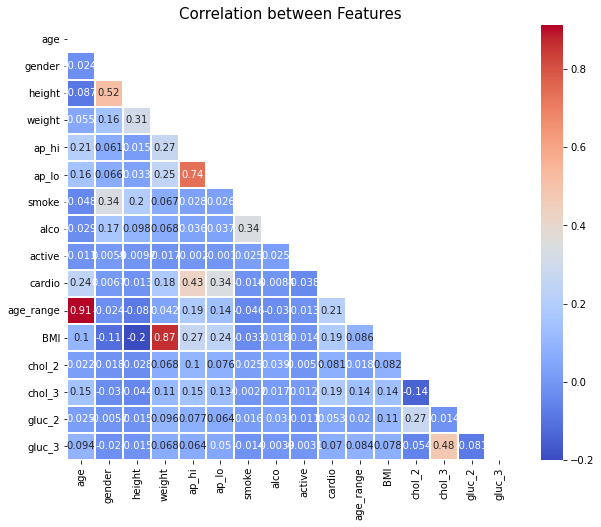

In [61]:
# plot the heat map
plt.figure(figsize= (10,8))
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(df.corr(), cmap= 'coolwarm', mask= mask, linewidths= 1, annot= True)
plt.title('Correlation between Features', fontsize= 15)
plt.show()

## Model

After the process of scrub and explore, Lets start with the modeling.The data was split into training and testing data and the training data was scaled using Standard Scaler.

First step is to define X and y variable.

In [62]:
# define X and y
y = df['cardio']
X = df.drop('cardio', axis= 1)

Splitting the data into train and test set. Test size = 0.20 and random_state = 42.

In [63]:
# Split the data into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.20)

Scaling the train and test set.

In [64]:
# Instantiate StandardScaler
ss = StandardScaler()
# Transform the train and test sets
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

### Fit the Model

Starting with the baseline model.

### Logisitc Regression

In [65]:
#Fitting the model
logreg = LogisticRegression()
model = logreg.fit(X_train_scaled, y_train)

predict the regression model for train and test set.

In [66]:
#predicting the train and test data
train_pred = logreg.predict(X_train_scaled)
test_pred = logreg.predict(X_test_scaled)

In [67]:
#Calculating the score
print('Train_Accuracy:', accuracy_score(y_train, train_pred))
print('Test_Accuracy:', accuracy_score(y_test, test_pred))
print('F1_score:', f1_score(y_test, test_pred))

Train_Accuracy: 0.7289835742084011
Test_Accuracy: 0.7227947087626982
F1_score: 0.7043417257775353


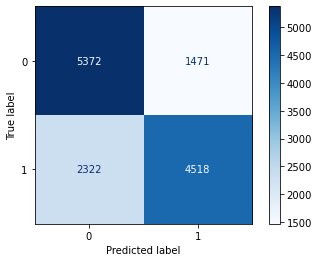

In [68]:
# plotting confusion matrix
plot_confusion_matrix(model, X_test_scaled, y_test,cmap = plt.cm.Blues)
plt.grid(False)

In [69]:
# Function to plot ROC Curve
'''
      Step 1 : Calculate false positive rate and true positive rate
      Step 2 : Calculate roc 
      Step 3 : plot the false positive rate and true positive rate
   
'''
def roc_curves(model):
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, model.predict_proba(X_train_scaled)[:, 1])
    roc_auc = auc(false_positive_rate, true_positive_rate)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, model.predict_proba(X_test_scaled)[:, 1])
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.figure()
    lw = 2
    plt.plot(false_positive_rate, true_positive_rate, color = 'darkorange',
         lw = lw, label = 'ROC curve (area = %0.3f)' % (roc_auc))
    plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc = "lower right")
    return plt.show()

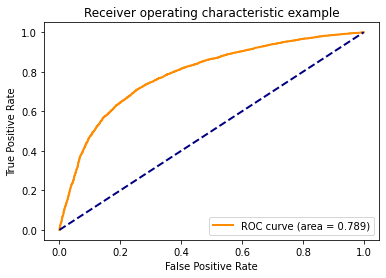

In [70]:
roc_curves(model)

In the logistic regression model the train and test accuracy score were 72% respectively. F1 score was 70% and the True Positive is 4518 and False Negative is 2322. 

### Decision Tree

Now lets start with decision tree baseline model.

In [71]:
#decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)  

In [72]:
# Fitting the Model
dt_classifier.fit(X_train_scaled, y_train)
dt_train_preds = dt_classifier.predict(X_train_scaled)
dt_test_preds = dt_classifier.predict(X_test_scaled)

In [73]:
#Calculating the score
print('Train_Accuracy:', accuracy_score(y_train, dt_train_preds))
print('Test_Accuracy:', accuracy_score(y_test, dt_test_preds))
print('F1_score:', f1_score(y_test, dt_test_preds))

Train_Accuracy: 0.9949754252617347
Test_Accuracy: 0.6316597237447928
F1_score: 0.6262236725007416


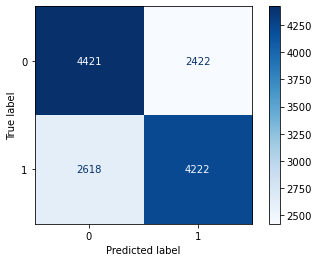

In [74]:
# plotting confusion matrix
plot_confusion_matrix(dt_classifier, X_test_scaled, y_test,cmap = plt.cm.Blues)
plt.grid(False)

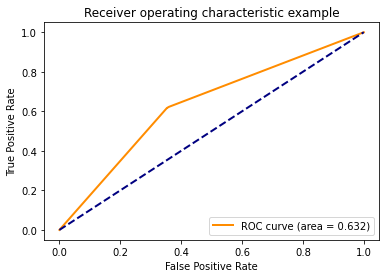

In [75]:
roc_curves(dt_classifier)

In the Decision tree model the train accuracy is 99% and test accuracy score were 64% respectively. F1 score is 62% and the True Positive is 4222 and False Negative is 2618. 

### XG Boost

In [76]:
# Initiate the model
xgb_classifier = XGBClassifier(random_state=42)

In [77]:
# Fitting Model
xgb_classifier.fit(X_train_scaled, y_train)
xgb_train_preds = xgb_classifier.predict(X_train_scaled)
xgb_test_preds = xgb_classifier.predict(X_test_scaled)

In [78]:
#Calculating the score
print('Train_Accuracy:', accuracy_score(y_train, xgb_train_preds))
print('Test_Accuracy:', accuracy_score(y_test, xgb_test_preds))
print('F1_score:', f1_score(y_test, xgb_test_preds))

Train_Accuracy: 0.7682666130712028
Test_Accuracy: 0.7244025433019075
F1_score: 0.7115869980879541


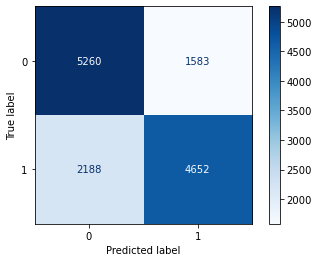

In [79]:
# plotting confusion matrix
plot_confusion_matrix(xgb_classifier, X_test_scaled, y_test,cmap = plt.cm.Blues)
plt.grid(False)

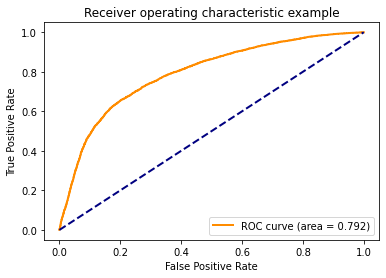

In [80]:
# roc_curve
roc_curves(xgb_classifier)

In the XG Boost model the train accuracy is 76% and test accuracy score were 72% respectively. F1 score is 72% and the True Positive is 4652 and False Negative is 2188. 

### Random Forest

In [81]:
# Random Forest
rf_classifier = RandomForestClassifier()

In [82]:
# Fitting the Model
rf_classifier.fit(X_train_scaled, y_train)
rf_train_preds = rf_classifier.predict(X_train_scaled)
rf_test_preds = rf_classifier.predict(X_test_scaled)

In [83]:
#Calculating the score
print('Train_Accuracy:', accuracy_score(y_train, rf_train_preds))
print('Test_Accuracy:', accuracy_score(y_test, rf_test_preds))
print('F1_score:', f1_score(y_test, rf_test_preds))

Train_Accuracy: 0.9949388829000019
Test_Accuracy: 0.7092011985675656
F1_score: 0.7042295398795808


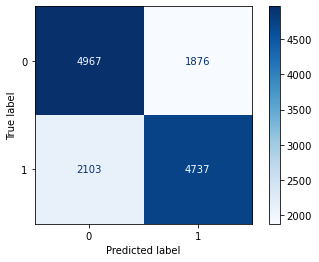

In [84]:
# plotting confusion matrix
plot_confusion_matrix(rf_classifier, X_test_scaled, y_test,cmap = plt.cm.Blues)
plt.grid(False)

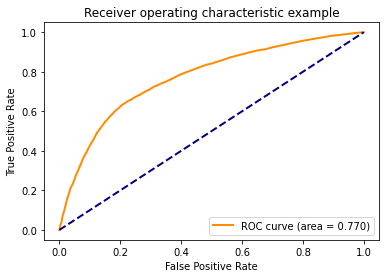

In [85]:
# roc_curve
roc_curves(rf_classifier)

In the Random Forest model the train accuracy is 99% and test accuracy score were 70% respectively. F1 score is 70% and the True Positive is 4779 and False Negative is 2061. 

### K-Nearest Neighbors

In [86]:
# Instantiate KNeighborsClassifier
kn_classifier = KNeighborsClassifier()

In [87]:
# Fitting the Model
kn_classifier.fit(X_train_scaled, y_train)
kn_train_preds = kn_classifier.predict(X_train_scaled)
kn_test_preds = kn_classifier.predict(X_test_scaled)

In [88]:
#Calculating the score
print('Train_Accuracy:', accuracy_score(y_train, kn_train_preds))
print('Test_Accuracy:', accuracy_score(y_test, kn_test_preds))
print('F1_score:', f1_score(y_test, kn_test_preds))

Train_Accuracy: 0.7829383713069376
Test_Accuracy: 0.6937806036687861
F1_score: 0.6895836420210403


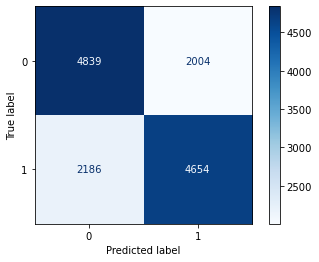

In [89]:
# plotting confusion matrix
plot_confusion_matrix(kn_classifier, X_test_scaled, y_test,cmap = plt.cm.Blues)
plt.grid(False)

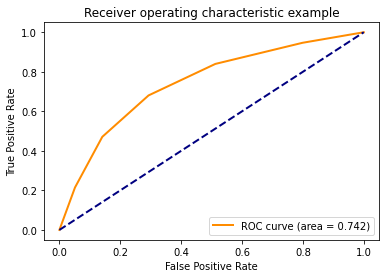

In [90]:
# roc_curve
roc_curves(kn_classifier)

In the K-Nearest Neighbors model the train accuracy is 78% and test accuracy score were 70% respectively. F1 score is 70% and the True Positive is 4654 and False Negative is 2186. 

In [91]:
# instantiate classifiers for vanilla models
classifiers = {
    'Logistic Regression' : LogisticRegression(), 
    'Random Forest' : RandomForestClassifier(), 
    'K-Nearest Neighbors' : KNeighborsClassifier(), 
    'Decision Tree' : DecisionTreeClassifier(), 
    'XGBoost' : XGBClassifier()
}

In [92]:
# create DataFrame to hold results from vanilla models
results = pd.DataFrame(columns= ['Train_accuracy', 'Test_accuracy', 'F1_score', 
                                'False_Negative', 'True_Positive'])

# predict, get accuracy and f1 scores and add to dataframe
conf_matrices = []
for key, value in classifiers.items():
    # fit models
    value.fit(X_train_scaled, y_train)
    train_pred = value.predict(X_train_scaled)
    y_pred = value.predict(X_test_scaled)
    
    # get accuracy, f1 score
    train_acc = accuracy_score(y_train, train_pred) * 100
    test_acc = accuracy_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred)
    
    # get false negative and true positive
    # add to confusion matrices list to view later if desired
    cm = confusion_matrix(y_test, y_pred)
    FN = cm[1][0]
    TP = cm[1][1]
    conf_matrices.append(cm)
    
    # add measurements to dataframe
    results.loc[key] = [round(train_acc, 2), round(test_acc, 2), 
                        round(f1, 2), round(FN, 0), round(TP, 0)]

In [93]:
results.sort_values(by= ['F1_score', 'False_Negative'], ascending= False)

,Train_accuracy,Test_accuracy,F1_score,False_Negative,True_Positive
XGBoost,76.83,72.44,0.71,2188.0,4652.0
Logistic Regression,72.90,72.28,0.70,2322.0,4518.0
Random Forest,99.50,70.94,0.70,2103.0,4737.0
K-Nearest Neighbors,78.29,69.38,0.69,2186.0,4654.0
Decision Tree,99.50,63.00,0.63,2603.0,4237.0


### Hyperparameter Tuning

In [94]:
# function to get results after each model

def get_results(model, model_name):
    train_pred = model.predict(X_train_scaled)
    y_pred = model.predict(X_test_scaled)
    
    # get classification report
    print('{} Classification Report'.format(model_name))
    print(classification_report(y_test, y_pred))
    
    # get confusion matrix
    plot_confusion_matrix(model, X_test_scaled, y_test, cmap= "Blues", values_format= '.5g')
    plt.grid(False)
    plt.show()
    
    # get accuracy and F1 scores
    train_acc = accuracy_score(y_train, train_pred) * 100
    test_acc = accuracy_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred)
    
    #get false negative and true positive
    cm = confusion_matrix(y_test, y_pred)
    FN = cm[1][0]
    TP = cm[1][1]
    
    # save measurements into results dataframe
    results.loc[model_name] = [round(train_acc, 2), round(test_acc, 2), 
                               round(f1, 2), round(FN, 0), round(TP, 0)]

### Logistic Regression

In [95]:
# Instantiate classifier
LG = LogisticRegression()

In [96]:
# set parameter criteria
param_grid_LG = {
    'penalty': ['l1', 'l2'],
    'C':[0.05, 0.1, 1], 
    'class_weight' : [None, {1 : 1.5}], 
    'random_state' : [42]
}

# Instantiate Grid Search
GS_LG = GridSearchCV(LG, param_grid_LG, scoring= 'recall')

In [97]:
# fit the model
GS_LG.fit(X_train_scaled, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.05, 0.1, 1], 'class_weight': [None, {1: 1.5}],
                         'penalty': ['l1', 'l2'], 'random_state': [42]},
             scoring='recall')

In [98]:
#best parameters
GS_LG.best_params_

{'C': 0.05, 'class_weight': {1: 1.5}, 'penalty': 'l2', 'random_state': 42}

GS Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.75      0.63      0.69      6843
           1       0.68      0.79      0.73      6840

    accuracy                           0.71     13683
   macro avg       0.72      0.71      0.71     13683
weighted avg       0.72      0.71      0.71     13683



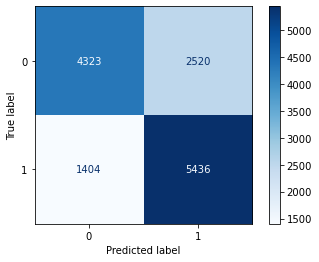

In [99]:
# model results
get_results(GS_LG, 'GS Logistic Regression')

In the tuned Logistic regression model the accuracy is 73% and the True Positive is 5436 and False Negative is 1404. There is increase in True positive cases and false negative is also reduced. 

### Decision Tree

In [100]:
# Instantiate classifier
DT = DecisionTreeClassifier()

In [101]:
# set parameter criteria
param_grid_DT = {
    'max_depth' : [3, 4, 5], 
    'min_samples_split' : [0.01, 0.05, 0.1], 
    'min_samples_leaf' : [5, 7], 
    'class_weight' : [{1 : 1.4}, {1 : 1.6}]
}
# Instantiate Randomized Search
RS_DT = RandomizedSearchCV(DT, param_grid_DT, n_jobs= 3, random_state=42)

In [102]:
#fit the model
RS_DT.fit(X_train_scaled, y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(), n_jobs=3,
                   param_distributions={'class_weight': [{1: 1.4}, {1: 1.6}],
                                        'max_depth': [3, 4, 5],
                                        'min_samples_leaf': [5, 7],
                                        'min_samples_split': [0.01, 0.05, 0.1]},
                   random_state=42)

In [103]:
#best parameters
RS_DT.best_params_

{'min_samples_split': 0.05,
 'min_samples_leaf': 7,
 'max_depth': 5,
 'class_weight': {1: 1.4}}

RS Decision Tree Classification Report
              precision    recall  f1-score   support

           0       0.72      0.72      0.72      6843
           1       0.72      0.72      0.72      6840

    accuracy                           0.72     13683
   macro avg       0.72      0.72      0.72     13683
weighted avg       0.72      0.72      0.72     13683



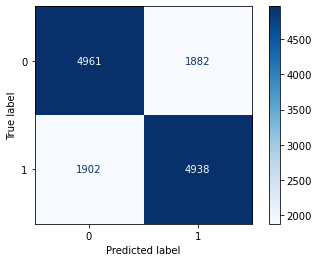

In [104]:
#model results
get_results(RS_DT, 'RS Decision Tree')

In the tuned Decision Tree model the accuracy is 72% and the True Positive is 4938 and False Negative is 1902. There is increase in True positive cases and false negative is also reduced. 

### XG Boost

In [105]:
# Instantiate classifier
XGB = XGBClassifier()

In [106]:
# create hyperparameter grid
param_grid_XGB = {
    'learning_rate': [0.08],
    'max_depth': [4],
    'min_child_weight': [2, 3],
    'n_estimaters' : [125, 150],
    'scale_pos_weight' : [1.5, 1.7]
}

# Instantiate Randomized Search
RS_XGB = RandomizedSearchCV(XGB, param_grid_XGB, n_jobs= 3, scoring= 'recall', 
                            random_state=42)

In [107]:
# fit model
RS_XGB.fit(X_train_scaled, y_train)

[02:19:24] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { n_estimaters } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_job...,
                                           num_parallel_tree=None,
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=

In [108]:
#find best parameters
RS_XGB.best_params_

{'scale_pos_weight': 1.7,
 'n_estimaters': 125,
 'min_child_weight': 2,
 'max_depth': 4,
 'learning_rate': 0.08}

RS XGBoost Classification Report
              precision    recall  f1-score   support

           0       0.76      0.64      0.69      6843
           1       0.69      0.80      0.74      6840

    accuracy                           0.72     13683
   macro avg       0.72      0.72      0.72     13683
weighted avg       0.72      0.72      0.72     13683



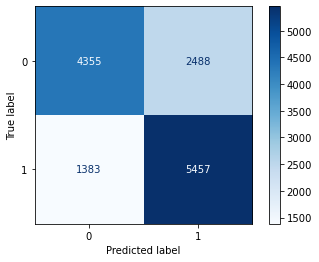

In [109]:
# model results
get_results(RS_XGB, 'RS XGBoost')

 In the tuned XG Boost model the accuracy is 74% and the True Positive is 5457 and False Negative is 1383. There is increase in True positive cases and false negative is also reduced. 

### Random Forest

In [110]:
# Instantiate classifier
RF = RandomForestClassifier()

In [111]:
param_grid_RF = {
    'n_estimators' : [200],
    'max_depth' : [100], 
    'min_samples_split' : [5, 8], 
    'min_samples_leaf' : [3],
    'class_weight' : [{1 : 1.5}, {1 : 1.7}]
}

# Instantiate Randomized Search
RS_RF = RandomizedSearchCV(RF, param_grid_RF, n_iter= 20, scoring= 'recall', 
                           random_state= 42)

In [112]:
# fit the model
RS_RF.fit(X_train_scaled, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'class_weight': [{1: 1.5}, {1: 1.7}],
                                        'max_depth': [100],
                                        'min_samples_leaf': [3],
                                        'min_samples_split': [5, 8],
                                        'n_estimators': [200]},
                   random_state=42, scoring='recall')

In [113]:
#find best parameters
RS_RF.best_params_

{'n_estimators': 200,
 'min_samples_split': 8,
 'min_samples_leaf': 3,
 'max_depth': 100,
 'class_weight': {1: 1.7}}

RS Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.74      0.67      0.70      6843
           1       0.70      0.76      0.73      6840

    accuracy                           0.72     13683
   macro avg       0.72      0.72      0.72     13683
weighted avg       0.72      0.72      0.72     13683



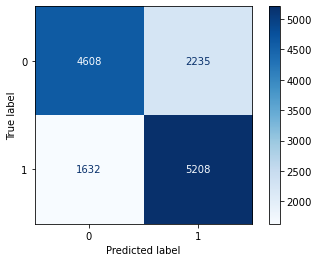

In [114]:
#model results
get_results(RS_RF, 'RS Random Forest')

In the tuned Random Forest model the accuracy is 73% and the True Positive is 5222 and False Negative is 1618.

### K-Nearest Neighbors

In [115]:
# Instantiate classifier
KNN = KNeighborsClassifier()

In [116]:
# set parameter guidelines
param_grid_KNN = {
    'n_neighbors' : [23, 25, 27], 
    'weights' : ['uniform', 'distance']
}

# Instantiate Grid Search
GS_KNN = GridSearchCV(KNN, param_grid_KNN, n_jobs= 3, scoring= 'recall')

In [117]:
# fit the model
GS_KNN.fit(X_train_scaled, y_train)

GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=3,
             param_grid={'n_neighbors': [23, 25, 27],
                         'weights': ['uniform', 'distance']},
             scoring='recall')

In [118]:
#best parameters
GS_KNN.best_params_

{'n_neighbors': 27, 'weights': 'distance'}

GS KNN Classification Report
              precision    recall  f1-score   support

           0       0.71      0.75      0.73      6843
           1       0.73      0.69      0.71      6840

    accuracy                           0.72     13683
   macro avg       0.72      0.72      0.72     13683
weighted avg       0.72      0.72      0.72     13683



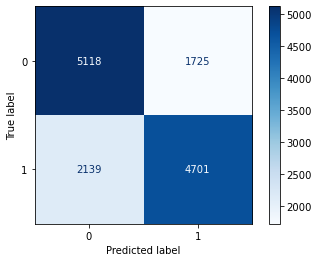

In [119]:
#model results
get_results(GS_KNN, 'GS KNN')

In the hyperparameter tuning K-Nearest Neighbors model the accuracy is 71% and the True Positive is 4701 and False Negative is 2139.

## Interpret

The last process is to interpret the results. Now, let's take the time to look in depth at some of the best results we achieved.

In [120]:
# view all results
results = results.sort_values(by= ['F1_score', 'False_Negative'], 
                              ascending= False)
results


,Train_accuracy,Test_accuracy,F1_score,False_Negative,True_Positive
RS XGBoost,72.43,71.71,0.74,1383.0,5457.0
RS Random Forest,84.82,71.74,0.73,1632.0,5208.0
GS Logistic Regression,71.43,71.32,0.73,1404.0,5436.0
RS Decision Tree,72.95,72.35,0.72,1902.0,4938.0
XGBoost,76.83,72.44,0.71,2188.0,4652.0
GS KNN,99.50,71.76,0.71,2139.0,4701.0
Logistic Regression,72.90,72.28,0.70,2322.0,4518.0
Random Forest,99.50,70.94,0.70,2103.0,4737.0
K-Nearest Neighbors,78.29,69.38,0.69,2186.0,4654.0
Decision Tree,99.50,63.00,0.63,2603.0,4237.0


Since we are looking at medical data, missing a diagnosis of cardiovascular disease could be deadly. But we had to weigh that against misdiagnosing too many people that don't have the disease and telling them to get a bunch of expensive tests.

Looking at F1 score (conveys the balance between the precision and the recall) and false negatives are so important to this prediction. We can see that the hyperparameter tuned XG Boost model was able to predict the most True Positive and fewest false negatives. It has the highest F1 score and testing and training accuracy are very similar.

The hyperparameter tuned decision tree had the most improvement and train/test accuracies are almost equal, but with regards to false negatives (misclassified 600 more than tuned XGBoost).

### ROC Curve

A receiver operating characteristic curve, or ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied.

Text(0, 0.5, 'True Positive Rate')

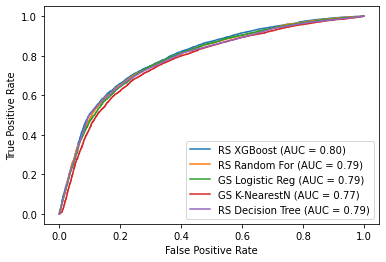

In [121]:
#ROC curve 
fig = plot_roc_curve(RS_XGB, X_test_scaled, y_test, name= 'RS XGBoost')
plot_roc_curve(RS_RF,X_test_scaled, y_test, ax = fig.ax_, name= 'RS Random For')
plot_roc_curve(GS_LG,X_test_scaled, y_test, ax = fig.ax_, name= 'GS Logistic Reg')
plot_roc_curve(GS_KNN,X_test_scaled, y_test, ax = fig.ax_, name= 'GS K-NearestN')
plot_roc_curve(RS_DT,X_test_scaled, y_test, ax = fig.ax_, name= 'RS Decision Tree')
# fig.figure.suptitle('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

While most of the tuned models perform similarly, the tuned XGBoost again slightly outperforms the other models.

### Feature Importance

Let's take a look at the tuned XGBoost and see which features were the most important to our model.

In [122]:
# create DataFrame with feature importance to create nice looking graph
# using tuned XGBoost model
FeatImp={'feature_names' : X.columns.values, 
         'feature_importance' : RS_XGB.best_estimator_.feature_importances_}
FI_df = pd.DataFrame(FeatImp)
FI_df.sort_values(by= ['feature_importance'], ascending= False, inplace= True)


Text(0, 0.5, 'Feature')

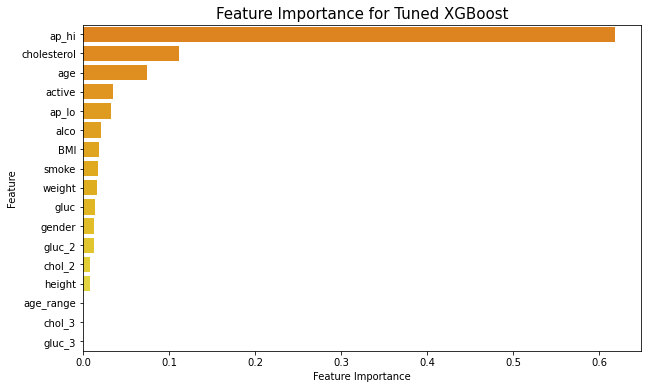

In [123]:
# plot new DataFrame
plt.figure(figsize= (10,6))
sns.barplot(x= FI_df['feature_importance'], y= FI_df['feature_names'], 
            palette= 'Wistia_r')
plt.title('Feature Importance for Tuned XGBoost', fontsize= '15')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')

In [124]:
FI_df

,feature_names,feature_importance
4,ap_hi,0.617748
6,cholesterol,0.111125
0,age,0.074779
10,active,0.034856
5,ap_lo,0.031897
9,alco,0.020734
12,BMI,0.018681
8,smoke,0.017888
3,weight,0.016616
7,gluc,0.013491


The systolic reading is by far the most important feature in predicting cardiovascular disease. Having a cholesterol well above normal, and a person's age are the second and third most important features, respectively. 

## Deep Neural Network

I'm going to take this a step further with deep neural networks.

In [125]:
#import necessary packages
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import optimizers

In [126]:
# Implement train/test split of dataset
train, valid_train, target, valid_target = train_test_split(X, y, test_size=0.2, shuffle=True)

Build a simple sequential model, and run for 50 epochs.

In [127]:
#model architecture
model = Sequential()
model.add(Dense(32, input_dim=train.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                576       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 609
Trainable params: 609
Non-trainable params: 0
_________________________________________________________________


In [128]:
#compiling the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [129]:
#fit the model
history = model.fit(train, target, epochs=50, validation_data=(X, y), batch_size=10)

Epoch 1/50
5474/5474 [==============================] - 9s 2ms/step - loss: 0.7831 - accuracy: 0.6688 - val_loss: 0.8823 - val_accuracy: 0.5493
Epoch 2/50
5474/5474 [==============================] - 9s 2ms/step - loss: 0.6328 - accuracy: 0.6824 - val_loss: 0.5820 - val_accuracy: 0.7125
Epoch 3/50
5474/5474 [==============================] - 10s 2ms/step - loss: 0.6148 - accuracy: 0.6919 - val_loss: 0.6864 - val_accuracy: 0.6347
Epoch 4/50
5474/5474 [==============================] - 12s 2ms/step - loss: 0.6107 - accuracy: 0.6927 - val_loss: 0.5878 - val_accuracy: 0.7132
Epoch 5/50
5474/5474 [==============================] - 11s 2ms/step - loss: 0.6062 - accuracy: 0.6961 - val_loss: 0.6010 - val_accuracy: 0.6947
Epoch 6/50
5474/5474 [==============================] - 8s 1ms/step - loss: 0.5970 - accuracy: 0.7016 - val_loss: 0.5559 - val_accuracy: 0.7311
Epoch 7/50
5474/5474 [==============================] - 9s 2ms/step - loss: 0.5941 - accuracy: 0.7023 - val_loss: 0.6181 - val_accura

In [130]:
#evaluating the score for train and test data
train_score = model.evaluate(train, target)
test_score = model.evaluate(valid_train, valid_target)
print('Train score:', train_score)
print('Test Score:', test_score)

428/428 [==============================] - 0s 775us/step - loss: 0.5525 - accuracy: 0.7282
Train score: [0.548420786857605, 0.7313222885131836]
Test Score: [0.5524638295173645, 0.7282028794288635]


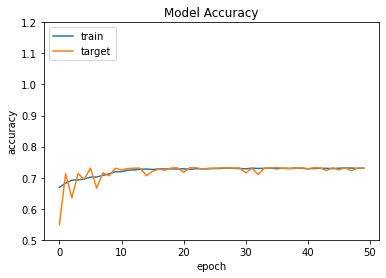

In [131]:
#plotting the Accuracy between training and test sets
import matplotlib.pyplot as plt
plt.ylim(0.5,1.2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','target'], loc='upper left')
plt.show()

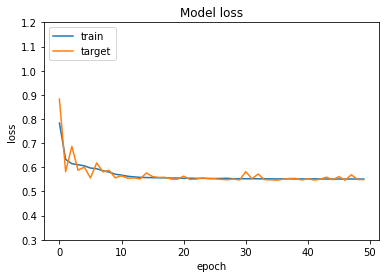

In [132]:
#plotting the loss between training and test sets
plt.ylim(0.3,1.2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','target'], loc='upper left')
plt.show()

From the neural network, model accuracy score is 73%. Model loss function for both train set and test set is 54. 

## Conclusion

- The model that performed the best overall was XGBoost with tuned hyperparameters.
- Due to it's highest true positive and lowest false negative rates as well as the highest F1 score. 
- It may not have been the most accurate model that was made, but was fairly close (by less than 2%).
- This model also had the highest AUC (Area Under the Curve) score showing us it was the most accurate.
- From the model, we can conclude that having a low blood pressure, low cholesterol, being young, and being active are the best ways to avoid cardiovascular disease.

## Next Step

- Taking it one step further, cholesterol could have been separated in HDL and LDL and instead of glucose, measure A1C.
- Knowledge about diabetes, lung disease, and anxiety/depression would also be insightful and maybe help the model predictions.
- It would also be interesting if this set had data on the different regions, races, and socioeconomic levels from the individuals 